In [36]:
import pandas as pd
import time
import pymzml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#these two modules are not needed
#from mzxml import MzXML
#import MSScan

# Data imports

In [2]:
#loading excel file
df_reference = pd.read_excel('../data/ALL_glycan_chymo_byonic_peptides.xlsx').reset_index()

In [155]:
#mini set for testing
one_spectrum_file = ['anti328_342_1']
mini_spectrum_files = ['anti328_342_1','PMAI_341_1']
"""'PMAI_342_0','iso_342_0','anti328_342_0',
                  'PMAI_341_0','anti3283_341_1', 'unlabel_342_1','anti3282_341_1','anti328_341_1','anti328_343_0',
                  'anti328_341_0','anti328_343_1','PMAIcleave_343_1','PMAI_343_0','PMAIcleave_343_0','PMAI_343_1',
                  'iso_341_1','iso_341_0','anti328cleave_343_0','anti328cleave_343_1','iso_343_0','unlabel_342_0',
                  'iso_343_1',
                  'anti328_15m_0','anti328_15m_1','iso_15m_0','iso_15m_1','iso_6h_0','iso_6h_1','anti328_6h_0',
                  'anti328_6h_1','iso_18h_0','iso_18h_1','anti328_18h_0','anti328_18h_1','iso_155_0','iso_155_1',
                  'iso_155_2','iso_155_3','PMAI_155_0','PMAI_155_1','PMAI_155_2','PMAI_155_3','anti328_155_0',
                  'anti328_155_1','anti328_155_2','anti328_155_3'
                  'iso_341_0','iso_341_1','iso_342_0','iso_342_1','iso_343_0','iso_343_1','anti328_341_0',
                  'anti328_341_1','anti328_342_0','anti328_342_1','anti328_343_0','anti328_343_1',
                  'PMAI_341_0','PMAI_341_1','PMAI_342_0','PMAI_342_1','PMAI_343_0','PMAI_343_1',
                  'anti328_15m_0','anti328_15m_1','iso_15m_0','iso_15m_1','iso_6h_0','iso_6h_1','anti328_6h_0',
                  'anti328_6h_1','iso_18h_0','iso_18h_1','anti328_18h_0','anti328_18h_1','unlabeled_342_0',
                  'unlabeled_342_1'
                  """
spectrum_files = ['unlabeled_342_0',
                  'unlabeled_342_1']

In [29]:
#shift the df_reference RT by the difference between the two spectrum files
#15m_anti328_1, 6h_iso_0 , 155_PMAI_1
#shows in the excel file, but has no corresponding mzml. providing a dummy variable of 66.66
time_shift_dict = {'anti328_341_0':68.83,'anti328_341_1':66.61,'anti328_342_0':65.09,
                   'anti328_342_1':71.12,'anti328_343_0':65.64,'anti328_343_1':64.86,'iso_341_0':74.18,
                   'iso_341_1':66.57,'iso_342_0':66.75,'iso_342_1':65.92,'iso_343_0':65.85,'iso_343_1':77.71,
                   'PMAI_341_0':67.52,'PMAI_341_1':63.52,'PMAI_342_0':66.75,'PMAI_342_1':67.56,
                   'PMAI_343_0':64.37,'PMAI_343_1':64.36,'unlabeled_342_0':64.15,'unlabeled_342_1':64.7,
                   'iso_15m_0':55.94,'iso_15m_1':55.82,'iso_6h_0':55.94,'iso_6h_1':56.49,
                   'iso_18h_0':55.29,'iso_18h_1':55.95,'anti328_15m_0':55.92,'anti328_15m_1':56.14,
                   'anti328_6h_0':55.39,'anti328_6h_1':55.92,'anti328_18h_0':56.32,'anti328_18h_1':55.13,
                  'GP_anti328_341':66.66,'GP_anti328_342':66.66,'GP_anti328_343':66.66,'GP_iso_341':66.66,
                  'GP_iso_342':66.66,'GP_iso_343':66.66,'GP_PMAI_341':66.66,'GP_PMAI_342':66.66,'GP_PMAI_343':66.66,
                  'GP_unlabeled_342':66.66}

In [149]:
folder = '../data/'

anti328_342_1 = '5169_342_anti328_glycan_chymo_include.mzML'
PMAI_341_1 = '5169_341_PMAI_glycan_chymo_include.mzML'
PMAI_342_1 = '5169_342_PMAI_glycan_chymo_include.mzML'
iso_342_1 = '5169_342_iso_glycan_chymo_include.mzML'
PMAI_342_0 = '5169_342_PMAI_glycan_chymo_scouting.mzML'
iso_342_0 = '5169_342_iso_glycan_chymo_scouting.mzML'
anti328_342_0 = '5169_342_anti328_glycan_chymo_scouting.mzML'
PMAI_341_0 = '5169_341_PMAI_glycan_chymo_scouting.mzML'
anti328_341_1 = '5169_341_anti328_glycan_chymo_include.mzML'
anti328_343_0 = '5169_343_anti328_glycan_chymo.mzML'
anti328_341_0 = '5169_341_anti328_glycan_chymo_scouting.mzML'
anti328_343_1 = '5169_343_anti328_glycan_chymo_include.mzML'
PMAI_343_0 = '5169_343_PMAI_glycan_chymo_scouting.mzML'
PMAI_343_1 = '5169_343_PMAI_glycan_chymo_include.mzML'
iso_341_1 = 'B_inclusion.mzML'
iso_341_0 = 'B_scouting.mzML'
iso_343_0 = '5169_343_iso_glycan_chymo_scouting.mzML'
iso_343_1 = '5169_343_iso_glycan_chymo_include.mzML'

unlabeled_342_0 = '342_unlabeled_glycan_C.mzML'
unlabeled_342_1 = '342_unlabeled_glycan_C_include.mzML'

anti328_15m_0 = '5162_15m_anti328_chymo_glycan_scouting.mzML'
anti328_15m_1 = '5162_15m_anti328_chymo_glycan_include.mzML'
iso_15m_0 = '5162_15m_iso_chymo_glycan_scouting.mzML'
iso_15m_1 = '5162_15m_iso_chymo_glycan_include.mzML'
iso_6h_0 = '5162_6h_anti328_chymo_glycan_scouting.mzML'
iso_6h_1 = '5162_6h_anti328_chymo_glycan_include.mzML'
anti328_6h_0 = '5162_6h_anti328_chymo_glycan_scouting.mzML'
anti328_6h_1 = '5162_6h_anti328_chymo_glycan_include.mzML'
iso_18h_0 = '5162_18h_iso_chymo_glycan_scouting.mzML'
iso_18h_1 = '5162_18h_iso_chymo_glycan_include.mzML'
anti328_18h_0 = '5162_18h_anti328_chymo_glycan_scouting.mzML'
anti328_18h_1 = '5162_18h_anti328_chymo_glycan_include.mzML'


In [213]:
file_dict = {'anti328_342_1': '5169_342_anti328_glycan_chymo_include.mzML',
            'PMAI_341_1': '5169_341_PMAI_glycan_chymo_include.mzML',
            'PMAI_342_1': '5169_342_PMAI_glycan_chymo_include.mzML',
            'iso_342_1': '5169_342_iso_glycan_chymo_include.mzML',
            'PMAI_342_0': '5169_342_PMAI_glycan_chymo_scouting.mzML',
            'iso_342_0': '5169_342_iso_glycan_chymo_scouting.mzML',
            'anti328_342_0': '5169_342_anti328_glycan_chymo_scouting.mzML',
            'PMAI_341_0': '5169_341_PMAI_glycan_chymo_scouting.mzML',
            'anti328_341_1': '5169_341_anti328_glycan_chymo_include.mzML',
            'anti328_343_0': '5169_343_anti328_glycan_chymo.mzML',
            'anti328_341_0': '5169_341_anti328_glycan_chymo_scouting.mzML',
            'anti328_343_1': '5169_343_anti328_glycan_chymo_include.mzML',
            'PMAI_343_0': '5169_343_PMAI_glycan_chymo_scouting.mzML',
            'PMAI_343_1': '5169_343_PMAI_glycan_chymo_include.mzML',
            'iso_341_1': 'B_inclusion.mzML',
            'iso_341_0': 'B_scouting.mzML',
            'iso_343_0': '5169_343_iso_glycan_chymo_scouting.mzML',
            'iso_343_1': '5169_343_iso_glycan_chymo_include.mzML',
            'unlabeled_342_0': '342_unlabeled_glycan_C.mzML',
            'unlabeled_342_1': '342_unlabeled_glycan_C_include.mzML',
            'anti328_15m_0': '5162_15m_anti328_chymo_glycan_scouting.mzML',
            'anti328_15m_1': '5162_15m_anti328_chymo_glycan_include.mzML',
            'iso_15m_0': '5162_15m_iso_chymo_glycan_scouting.mzML',
            'iso_15m_1': '5162_15m_iso_chymo_glycan_include.mzML',
            'iso_6h_0': '5162_6h_anti328_chymo_glycan_scouting.mzML',
            'iso_6h_1': '5162_6h_anti328_chymo_glycan_include.mzML',
            'anti328_6h_0': '5162_6h_anti328_chymo_glycan_scouting.mzML',
            'anti328_6h_1': '5162_6h_anti328_chymo_glycan_include.mzML',
            'iso_18h_0': '5162_18h_iso_chymo_glycan_scouting.mzML',
            'iso_18h_1': '5162_18h_iso_chymo_glycan_include.mzML',
            'anti328_18h_0': '5162_18h_anti328_chymo_glycan_scouting.mzML',
            'anti328_18h_1': '5162_18h_anti328_chymo_glycan_include.mzML'}

In [196]:
rev = 'Supplementary Tables_1_revision.xlsx'

# Prior Versions

In [9]:
#working version. split scans into ms level 1 and ms level 2
#for now, we're just looking at ms level 1
run = pymzml.run.Reader((folder + anti328_342_1), MS1_Precision = 5e-6, MSn_Precision = 20e-6)
ms1 = []
for spectrum in run:
    for mz, i in spectrum.peaks:
        if spectrum['ms level'] == 1:
            ms1.append((spectrum['id'], spectrum['scan time'], mz, i))
        #if spectrum['ms level'] == 2:
            #ms2.append((spectrum['id'], spectrum['scan time'], mz, i)) 

ms1_df = pd.DataFrame(ms1)
ms1_df.columns = ['scan', 'scan_time', 'mz', 'intensity']

FileNotFoundError: [Errno 2] No such file or directory: '../data/5169_342_anti328_glycan_chymo_include.mzML'

In [27]:
#setting variables to test that the scan is right
target_column = ms1_df['mz'].values
target = 1194.604980
target_range = .01
scan_time_column = ms1_df['scan_time'].values
scan_time = 86.650095
scan_time_range = 3

In [34]:
for filename_num, filename in enumerate(mini_spectrum_files):
    start = time.time()
    print 'Running {}, file number {} of {}'.format(filename_num, filename, len(spectrum_files))
    
    run = pymzml.run.Reader(eval(spectrum_files[0]), MS1_Precision = 5e-6, MSn_Precision = 20e-6)
    ms1 = []
    for spectrum in run:
        for mz, i in spectrum.peaks:
            if spectrum['ms level'] == 1:
                ms1.append((spectrum['id'], spectrum['scan time'], mz, i))
    
    df = pd.DataFrame(ms1)
    df.columns = ['scan', 'scan_time', 'mz', 'intensity']

Running 0, file number anti328_342_1 of 26
Running 1, file number PMAI_341_1 of 26


In [ ]:
# for every MZML file, find matches with the excel df_reference and output it as a new column

target_range = .01
scan_time_range = 3

for filename_num, filename in enumerate(spectrum_files):
    start = time.time()
    print('Running {}, file number {} of {}'.format(filename_num, filename, len(spectrum_files)))
    
    run = pymzml.run.Reader(path, MS1_Precision = 5e-6, MSn_Precision = 20e-6)
    ms1 = []
    for spectrum in run:
        for mz, i in spectrum.peaks:
            if spectrum['ms level'] == 1:
                ms1.append((spectrum['id'], spectrum['scan time'], mz, i))
    
    df = pd.DataFrame(ms1)
    df.columns = ['scan', 'scan_time', 'mz', 'intensity']
    
    #filter df_reference for rows related to the specific filename
    rt_shift = [(float(time_shift_dict[cell]) - float(time_shift_dict[filename])) for cell in df_reference['Spectrum File']] 
    mz = df_reference['m/z [Da]'].values
    rt = df_reference['RT [min]'].values
    rt_adj = rt - rt_shift
    intensity_calc = [0] * len(mz)
    #RT_percent_captured = [0] * len(mz)

    print('mz {} = rt {} length'.format(len(mz),len(rt_adj)))
    for idx in range(len(mz)):
        if idx % 1500 == 0:
            print('calculating row {}, {} seconds elapsed'.format(idx, time.time()-start))

        #filtered by mz and scan time
        intensity_calc[idx]  = df['intensity'][((np.abs(df['mz'] - mz[idx]) <= target_range) 
        & (np.abs(df['scan_time'] - rt_adj[idx]) <= scan_time_range) )].sum()

    #set intensity and RT_percent in the excel reference file
    #rt percent is the percent of intensity captured by the time window
    
    column_intensity_name = filename + ' intensity'
    df_reference[column_intensity_name] = intensity_calc
    
    end = time.time()
    print('{} run time: {}'.format(filename, (end - start)))
    
df_reference.to_excel('df_reference.xlsx')

# Current Version

In [78]:
def read_mzml(path, ms_level):
    df = pd.DataFrame(columns = ['scan', 'scan_time', 'mz', 'intensity'])
    msrun = pymzml.run.Reader(path, MS1_Precision = 5e-6, MSn_Precision = 20e-6)
    for spectrum in msrun:
        if spectrum.ms_level == ms_level:
            df = pd.concat([df, pd.DataFrame({'scan':spectrum.ID, 'scan_time':spectrum.scan_time, 'mz':spectrum.mz, 'intensity':spectrum.i})])
    return df

def read_mzml_one(path, scan, ms_level):
    msrun = pymzml.run.Reader(path, MS1_Precision = 5e-6, MSn_Precision = 20e-6)
    spectrum = msrun.__getitem__(scan)
    if spectrum.ms_level == ms_level:
        return pd.DataFrame({'scan':spectrum.ID, 'scan_time':spectrum.scan_time, 'mz':spectrum.mz, 'intensity':spectrum.i})
    
def scan_mzml(df_reference, file_list, time_shift_dict):
    start = time.time()
    
    for filename in file_list:
        print('Running {}, file number {} of {}'.format(filename_num, filename, len(file_list)))
        
        path = '../data/' + eval(filename)
        df = read_mzml(path, 1)

        #filter df_reference for rows related to the specific filename
        rt_shift = [(float(time_shift_dict[cell]) - float(time_shift_dict[filename])) for cell in df_reference['Spectrum File']] 
        mz = df_reference['m/z [Da]'].values
        rt = df_reference['RT [min]'].values
        rt_adj = rt - rt_shift
        intensity_calc = [0] * len(mz)

        print('mz {} = rt {} length'.format(len(mz),len(rt_adj)))
        for idx in range(len(mz)):
            if idx % 2000 == 0:
                print('calculating row {}, {} seconds elapsed'.format(idx, time.time()-start))

            #filtered by mz and scan time
            intensity_calc[idx]  = df['intensity'][((np.abs(df['mz'] - mz[idx]) <= target_range) 
            & (np.abs(df['scan_time'] - rt_adj[idx]) <= scan_time_range) )].sum()

        #set intensity and RT_percent in the excel reference file
        #rt percent is the percent of intensity captured by the time window

        column_intensity_name = filename + '_intensity'
        df_reference[column_intensity_name] = intensity_calc

        end = time.time()
        print('{} run time: {}'.format(filename, (end - start)))
    
    df_reference.to_csv('df_reference.csv')

In [195]:
filename = 'unlabeled_342_0'
scan_mzml(df_reference, filename, time_shift_dict)

Running 1, file number unlabeled_342_0 of 2
mz 9550 = rt 9550 length
calculating row 0, 565.0653188228607 seconds elapsed
calculating row 2000, 647.5450298786163 seconds elapsed
calculating row 4000, 730.2305669784546 seconds elapsed
calculating row 6000, 812.6213309764862 seconds elapsed
calculating row 8000, 895.7536242008209 seconds elapsed
unlabeled_342_0 run time: 959.6476879119873


# supplementary investigation (reviewer #2)

## load data

In [3]:
folder = '../data/'
filename = 'Supplementary Tables_1_revision.xlsx'
path = folder + filename
supp = pd.read_excel(path, sheet='TableS1_TotalGlycopeptides', header=1)
supp['filename'] = supp['Spectrum file (PRIDE)'].str.split('.', expand=True).iloc[:,0]

In [4]:
# supplement file
q = supp.filename

# gather mxml in one file
import os
path = '../data/mzml'
s = pd.Series(os.listdir(path))
s = s.str.split('.', expand=True).iloc[:,0]

In [5]:
print('mzml file found')
print(q[q.isin(s)].nunique())
print()
print('mzml file NOT found')
print(q[~q.isin(s)].nunique())

mzml file found
75

mzml file NOT found
18


In [387]:
# excel file, not in folder
for i in q[~q.isin(s)].unique():
    print(i)

5169_341_iso_GP_trypsin
5169_341_anti328_GP_trypsin
5169_342_iso_GP_trypsin
5169_342_PMAI_GP_chymo
5169_341_PMAI_GP_chymo
5169_343-iso-GP-trypsin
5169_342_anti328_GP_chymo
5169_342_anti328_GP_trypsin
5169_341_PMAI_GP_trypsin
5169_342_PMAI_GP_trypsin
5169_341_iso_GP_chymo
5169_341_anti328_GP_chymo
5169_343-iso-GP-chymo
5169_342_iso_GP_chymo
5169_343_anti328_GP_trypsin
5169_343_PMAI_GP_trypsin
5169_343_anti328_GP_chymo
5169_343_PMAI_GP_chymo
nan


In [290]:
# folder, not in excel
for i in s[~s.isin(q)].iloc[:,0].unique():
    print(i)

342_unlabeled_glycan_C
342_unlabeled_glycan_C_include
342_unlabeled_glycan_T
342_unlabeled_glycan_T_include
343_PMAI_cleave_include
5157_PriT_control_cleave_HCDETDCID
5162_6h_anti328_trypsin_glycan_include
5162_6h_iso_trypsin_glycan
5162_TMT_chymo_glycan_include
B_inclusion
B_scouting_chymoglycan
D_inclusion
D_scouting
E_inclusion
E_scouting


In [ ]:
# some file names were renamed in excel. modify file names to match excel file
mapping = {'B_inclusion':'5169_341-iso-glycan-chymo_inclusion',
        'B_scouting_chymoglycan':'5169_341-iso-glycan-chymo_scouting',
        'D_inclusion':'341_iso_glycan_trypsin_include',
        'D_scouting':'341_iso_glycan_trypsin_scout',
        'E_inclusion':'343_iso_glycan_trypsin_inclusion',
        'E_scouting': '343_iso_glycan_trypsin_scouting',
        '343_PMAI_cleave_include': np.NaN,
        '5162_6h_anti328_trypsin_glycan_include': np.NaN,
        '5162_6h_iso_trypsin_glycan': np.NaN,
        '5162_TMT_chymo_glycan_include': np.NaN}

In [6]:
folder = '../data/mzml/'
filename = '5169_343_iso_glycan_chymo_scouting'
extension = '.mzml'
path = folder + filename + extension

## relationship between two mz

In [ ]:
138.055 vs 144.065
281.12 vs 286.12

In [9]:
path = '../data/mzml/5169_343_PMAI_glycan_trypsin_include.mzml'
msrun = pymzml.run.Reader(path, MS1_Precision = 5e-6, MSn_Precision = 20e-6)

In [84]:
ex_file = supp[(supp['Activation Type'] == 'HCD') & (supp['filename'].isin(s))]

In [37]:
ex_file = supp[(supp['Activation Type'] == 'HCD') & (supp['filename'].str.contains('include'))]

In [26]:
ex_file = supp[(supp['Activation Type'] == 'HCD') & (supp['filename'].str.contains('5169_343_PMAI_glycan_trypsin_include'))]

In [47]:
output = {}
folder = '../data/mzml/'
extension = '.mzml'

threshhold = .01
for index, row in ex_file.iterrows():
    if index % 2000 == 0:
        print('index:{}'.format(index))
        print('output so far:{}'.format(len(output)))
    try:
        scan = row['First Scan']
        path = folder + row['filename'] + extension
        ms_level = 2

        tmp = read_mzml_one(path, scan, ms_level)
        
        numerator = tmp[np.abs(tmp.mz - 281.12) <= threshhold].intensity.sum()
        denominator = tmp[np.abs(tmp.mz - 287.13) <= threshhold].intensity.sum()
        output[row['List No.']] = [numerator, denominator, tmp.empty]
    except:
        continue

index:6000
output so far:1516
index:8000
output so far:2056
index:12000
output so far:3081


In [49]:
odf = pd.DataFrame(output).T
odf.columns = ['281mz','286mz','empty_result']
tmp = odf[(odf.iloc[:,0] != 0) & (odf.iloc[:,1] != 0)]

In [52]:
(tmp.iloc[:,0] / tmp.iloc[:,1]).median()

1.0756453275680542

In [51]:
tmp.shape

(298, 3)

In [41]:
tmp.to_csv('20170923_281mz_286mz.csv')

In [82]:
#138 intensity
tmp.iloc[:,0].median()

562.4419555664062

In [83]:
# 144 intensity
tmp.iloc[:,1].median()

273.5042419433594

In [ ]:
ex_file[ex_file.filename.str.contains('include')].filename.nunique()

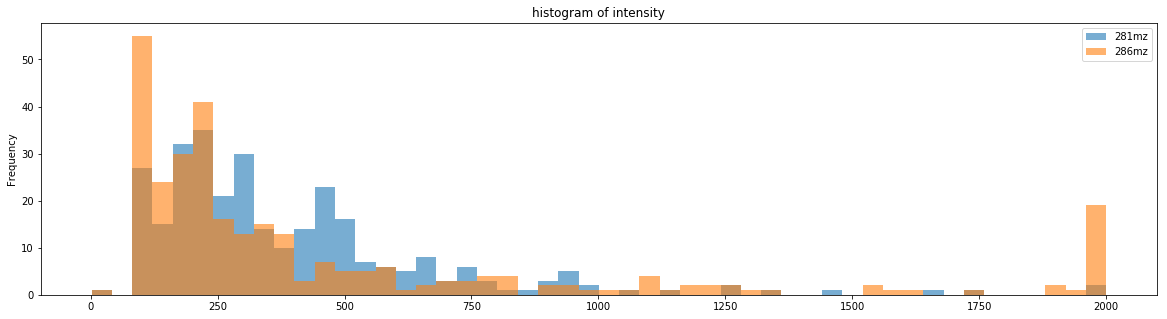

In [76]:
tmp.iloc[:,:2].clip(0,2000).plot.hist(figsize=(20,5), bins=50, alpha=0.6, title='histogram of intensity')

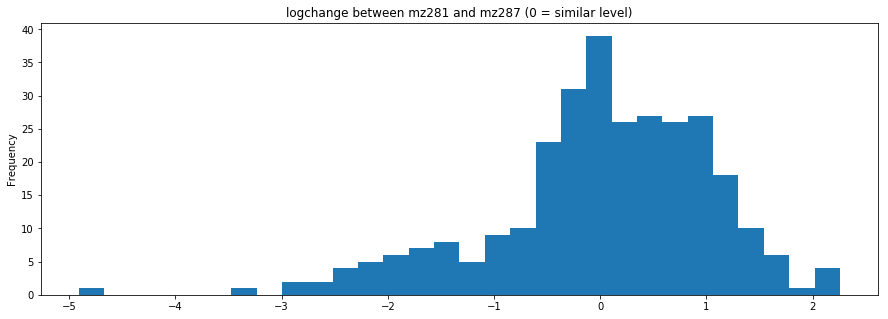

In [75]:
(tmp.iloc[:,0].astype(float).apply(np.log) - tmp.iloc[:,1].astype(float).apply(np.log)).plot.hist(figsize=(15,5), bins=30, title='logchange between mz281 and mz287 (0 = similar level)')

In [ ]:
ex_file.merge(odf.reset_index(), left_on='List No.', right_on='index')

## spectra count

In [14]:
output = {}
for filename in ex_file.filename:
    try:
        folder = '../data/mzml/'
        extension = '.mzml'
        path = folder + filename + extension
        msrun = pymzml.run.Reader(path, MS1_Precision = 5e-6, MSn_Precision = 20e-6)
        output[filename] = msrun.get_spectrum_count()
    except:
        continue

In [16]:
output

{'341_iso_glycan_trypsin_include': 15180,
 '343_anti328_cleave_include': 15177,
 '5162_15m_anti328_chymo_glycan_include': 14343,
 '5162_15m_anti328_trypsin_glycan_include': 14802,
 '5162_15m_iso_chymo_glycan_include': 14404,
 '5162_15m_iso_trypsin_glycan_include': 14779,
 '5162_18h_anti328_chymo_glycan_include': 14190,
 '5162_18h_anti328_trypsin_glycan_include': 14863,
 '5162_18h_iso_chymo_glycan_include': 14372,
 '5162_18h_iso_trypsin_glycan_include': 15011,
 '5162_6h_anti328_chymo_glycan_include': 14327,
 '5162_6h_iso_chymo_glycan_include': 14322,
 '5162_6h_iso_trypsin_glycan_include': 15087,
 '5169_341_PMAI_glycan_chymo_include': 16047,
 '5169_341_PMAI_glycan_trypsin_include': 15076,
 '5169_341_anti328_glycan_chymo_include': 15096,
 '5169_341_anti328_glycan_trypsin_include': 14697,
 '5169_341_anti328_glycan_trypsin_include_2': 14750,
 '5169_341_anti328_glycan_trypsin_include_3': 15052,
 '5169_342_PMAI_glycan_chymo_include': 15470,
 '5169_342_PMAI_glycan_trypsin_include': 14970,
 '51

In [24]:
pd.DataFrame(output, index = [0]).T.sum()

0    432969
dtype: int64

In [26]:
# per file average
pd.DataFrame(output, index = [0]).T.mean()

0    14929.965517
dtype: float64

## Extended Glycan Searching

In [326]:
file_population = supp[(supp['Activation Type'] == 'HCD') & (supp['filename'].str.contains('include'))].filename.unique()

In [82]:
folder = '../data/mzml/'
filename = '5169_343_PMAI_glycan_trypsin_include'
extension = '.mzml'
path = folder + filename + extension

In [83]:
msrun = pymzml.run.Reader(path, MS1_Precision = 5e-6, MSn_Precision = 20e-6)

two mz combinations we expect to show up:
[366.14, 163.06, 204.0872]
[163.06, 507.19, 509.206]

In [353]:
# identify scans matching all three
final_output = pd.DataFrame()
scan_output = {}
ms_level = 2
mz_threshhold = .01
minimum_intensity = 100
mz = [163.06, 507.19, 509.206]

for filename in file_population:
#for filename in ['5162_6h_anti328_chymo_glycan_include']:
    try:
        print(final_output.shape)
        folder = '../data/mzml/'
        extension = '.mzml'
        path = folder + filename + extension
        msrun = pymzml.run.Reader(path, MS1_Precision = 5e-6, MSn_Precision = 20e-6)

        scan_agg = pd.DataFrame()
        for index, spectrum in enumerate(msrun):
            if spectrum.ms_level == ms_level:
                tmp = pd.DataFrame({'scan':spectrum.ID, 'scan_time':spectrum.scan_time, 'mz':spectrum.mz, 'intensity':spectrum.i})

                # look for above average peaks per scan, not noise
                intensity_threshhold = max(tmp.intensity.mean() , minimum_intensity)
                scan_agg =  pd.concat([scan_agg, tmp[((np.abs(tmp.mz - mz[0]) < mz_threshhold) 
                                                 | (np.abs(tmp.mz - mz[1]) < mz_threshhold) 
                                                 | (np.abs(tmp.mz - mz[2]) < mz_threshhold))
                                                 & (tmp.intensity >= intensity_threshhold)]])
                scan_output[filename] = list(scan_agg.scan.value_counts()[scan_agg.scan.value_counts() == len(mz)].index)
        final_output = pd.concat([final_output, supp[(supp['First Scan'].isin(scan_output[filename])) & (supp.filename == filename)]])
    except:
        print('{} returned an exception'.format(filename))
        continue

(0, 0)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
5169_341_anti328_glycan_chymo_include returned an exception
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)
(0, 48)


In [355]:
len(scan_output)

30

In [356]:
op = 0
for i, j in scan_output.items():
    
    op += len(j)

In [350]:
final_output.to_csv('20170924_mz_366.14_163.06_204.0872.csv')

In [352]:
final_output.T

,4092,11636,1135,16171,2267
List No.,2671,13578,838,8867,1501
Peptide Sequence,GGGFFSGLGGKPSQDAANKNPFSSASGGFGStATSNTSNLFGNSGAK,PtSTQVLPVGWsPYHQASLLSIGISSAGQLTPSQGAPIR,APVTVTSLPAGVRMVVPtQSAQGtVIGSSPQMSGMAALAAAAAATQK,SRFEYPPPPVsLGSSSHTAR,cPEALFQPcFLGMEscGIHETTFNSIMK
Protease,Trypsin,Trypsin,Trypsin,Trypsin,Trypsin
UniProt Accession,P35658,Q5H9F3,P51610,Q9H1B7,Q6S8J3
Alternative Accessions,NaN,NaN,NaN,NaN,NaN
Entry Name,NU214_HUMAN,BCORL_HUMAN,HCFC1_HUMAN,I2BPL_HUMAN,POTEE_HUMAN
Protein Names,Nuclear pore complex protein Nup214 (214 kDa n...,BCL-6 corepressor-like protein 1 (BCoR-L1) (BC...,Host cell factor 1 (HCF) (HCF-1) (C1 factor) (...,Interferon regulatory factor 2-binding protein...,POTE ankyrin domain family member E (ANKRD26-l...
Gene Names,NUP214 CAIN CAN KIAA0023,BCORL1,HCFC1 HCF1 HFC1,IRF2BPL C14orf4 EAP1 KIAA1865 My039,POTEE A26C1A POTE2
Modifications,T32({HexNAz2Si(1)}),T2({HexNAz2Si(1)}); S12({HexNAz2Si(1)}),T18({HexNAc(1)}); T24({HexNAc(1)}),S11({HexNAz2Si(1)}),C1(Carbamidomethyl); C9(Carbamidomethyl); S15(...
Activation Type,HCD,HCD,HCD,ETD,HCD


In [312]:
path = '../data/mzml/5162_6h_anti328_chymo_glycan_include.mzml'
scan = 3401
ms_level = 2

msrun = pymzml.run.Reader(path, MS1_Precision = 5e-6, MSn_Precision = 20e-6)
spectrum = msrun.__getitem__(scan)
if spectrum.ms_level == ms_level:
    tmp = pd.DataFrame({'scan':spectrum.ID, 'scan_time':spectrum.scan_time, 'mz':spectrum.mz, 'intensity':spectrum.i})


In [300]:
# [366.14, 163.06, 204.0872]
tmp = read_mzml_one('../data/mzml/5162_6h_anti328_chymo_glycan_include.mzml', 3401, 2).sort_values('mz')

In [305]:
tmp.sort_values('mz')

,intensity,mz,scan,scan_time
0,120.269501,101.055786,3401,36.482028
1,96.271156,105.065689,3401,36.482028
2,89.360283,116.427170,3401,36.482028
3,99.427841,126.055244,3401,36.482028
4,186.594315,127.038445,3401,36.482028
5,186.872284,138.054062,3401,36.482028
6,103.971474,151.082001,3401,36.482028
7,154.613937,156.064178,3401,36.482028
8,87.367096,156.294739,3401,36.482028
9,176.267899,174.075806,3401,36.482028


In [296]:
tmp[((np.abs(tmp.mz - mz[0]) < threshhold) 
     | (np.abs(tmp.mz - mz[1]) < threshhold) 
     | (np.abs(tmp.mz - mz[2]) < threshhold))]

,intensity,mz,scan,scan_time


In [150]:
pd.DataFrame(scan_output)

{'5169_343_PMAI_glycan_trypsin_include': [2749,
  2814,
  4668,
  3401,
  4661,
  6861,
  6835,
  4658,
  2975,
  5388,
  5391,
  2878,
  8171,
  5628,
  6878,
  5641,
  2881]}

In [139]:
tmp[((np.abs(tmp.mz - mz[0]) < threshhold) | (np.abs(tmp.mz - mz[1]) < threshhold) | (np.abs(tmp.mz - mz[2]) < threshhold))]

,intensity,mz,scan,scan_time


In [361]:
# use all glycosites instead of just ETD
# use all syranine
supp.T

,0,1,2,3,4,5,6,7,8,9,...,23145,23146,23147,23148,23149,23150,23151,23152,23153,23154
List No.,20146,20624,20796,21809,21810,21811,22474,13999,14004,14012,...,13202,13203,13204,13205,13206,13207,13208,13209,13210,13770
Peptide Sequence,AAAAAAAQTsATSTNANPL,AAAAAAAQTsATSTNANPL,AAAAAAAQtSATSTNANPL,AAAAAAAQTsATSTNANPL,AAAAAAAQTsATSTNANPL,AAAAAAAQtSATSTNANPL,AAAAAAAQTSAtSTNANPL,AAAAAATQKIPPsSAPTVL,AAAAAATQKIPPSsAPTVL,AAAAAATQKIPPSSAPtVL,...,YVSAESVVPStQAVTFSPSFHNQAIMVTKPVQEYK,YVSAESVVPSTQAVTFSPsFHNQAIMVTKPVQEYK,YVSAESVVPSTQAVTFsPSFHNQAIMVTKPVQEYK,YVSAESVVPStQAVTFSPSFHNQAIMVTKPVQEYK,YVSAEsVVPSTQAVTFSPSFHNQAIMVTKPVQEYK,YVSAESVVPSTQAVTFsPSFHNQAIMVTKPVQEYK,YVSAESVVPSTQAVtFSPSFHNQAIMVTKPVQEYK,YVSAESVVPsTQAVTFSPSFHNQAIMVTKPVQEYK,YVSAESVVPSTQAVTFSPsFHNQAIMVTKPVQEYK,YVSAESVVPsTQAVTFSPSFHNQAIMVTKPVQEYK
Protease,Chymotrypsin,Chymotrypsin,Chymotrypsin,Chymotrypsin,Chymotrypsin,Chymotrypsin,Chymotrypsin,Chymotrypsin,Chymotrypsin,Chymotrypsin,...,Trypsin,Trypsin,Trypsin,Trypsin,Trypsin,Trypsin,Trypsin,Trypsin,Trypsin,Trypsin
UniProt Accession,O95319,O95319,O95319,O95319,O95319,O95319,O95319,P51610,P51610,P51610,...,Q9UKA4,Q9UKA4,Q9UKA4,Q9UKA4,Q9UKA4,Q9UKA4,Q9UKA4,Q9UKA4,Q9UKA4,Q9UKA4
Alternative Accessions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Entry Name,CELF2_HUMAN,CELF2_HUMAN,CELF2_HUMAN,CELF2_HUMAN,CELF2_HUMAN,CELF2_HUMAN,CELF2_HUMAN,HCFC1_HUMAN,HCFC1_HUMAN,HCFC1_HUMAN,...,AKA11_HUMAN,AKA11_HUMAN,AKA11_HUMAN,AKA11_HUMAN,AKA11_HUMAN,AKA11_HUMAN,AKA11_HUMAN,AKA11_HUMAN,AKA11_HUMAN,AKA11_HUMAN
Protein Names,CUGBP Elav-like family member 2 (CELF-2) (Brun...,CUGBP Elav-like family member 2 (CELF-2) (Brun...,CUGBP Elav-like family member 2 (CELF-2) (Brun...,CUGBP Elav-like family member 2 (CELF-2) (Brun...,CUGBP Elav-like family member 2 (CELF-2) (Brun...,CUGBP Elav-like family member 2 (CELF-2) (Brun...,CUGBP Elav-like family member 2 (CELF-2) (Brun...,Host cell factor 1 (HCF) (HCF-1) (C1 factor) (...,Host cell factor 1 (HCF) (HCF-1) (C1 factor) (...,Host cell factor 1 (HCF) (HCF-1) (C1 factor) (...,...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...,A-kinase anchor protein 11 (AKAP-11) (A-kinase...
Gene Names,CELF2 BRUNOL3 CUGBP2 ETR3 NAPOR,CELF2 BRUNOL3 CUGBP2 ETR3 NAPOR,CELF2 BRUNOL3 CUGBP2 ETR3 NAPOR,CELF2 BRUNOL3 CUGBP2 ETR3 NAPOR,CELF2 BRUNOL3 CUGBP2 ETR3 NAPOR,CELF2 BRUNOL3 CUGBP2 ETR3 NAPOR,CELF2 BRUNOL3 CUGBP2 ETR3 NAPOR,HCFC1 HCF1 HFC1,HCFC1 HCF1 HFC1,HCFC1 HCF1 HFC1,...,AKAP11 AKAP220 KIAA0629,AKAP11 AKAP220 KIAA0629,AKAP11 AKAP220 KIAA0629,AKAP11 AKAP220 KIAA0629,AKAP11 AKAP220 KIAA0629,AKAP11 AKAP220 KIAA0629,AKAP11 AKAP220 KIAA0629,AKAP11 AKAP220 KIAA0629,AKAP11 AKAP220 KIAA0629,AKAP11 AKAP220 KIAA0629
Modifications,S10({HexNAz2Si(1)}),S10({HexNAz2Si(1)}),T9({HexNAz2Si(1)}),S10({HexNAz2Si(1)}),S10({HexNAz2Si(1)}),T9({HexNAz2Si(1)}),T12({HexNAz2Si(1)}),S13({HexNAz2Si(1)}),S14({HexNAz2Si(1)}),T17({HexNAz2Si(1)}),...,T11({HexNAz2Si(1)}),S19({HexNAz2Si(1)}),S17({HexNAz2Si(1)}),T11({HexNAz2Si(1)}),S6({HexNAz2Si(1)}),S17({HexNAz2Si(1)}),T15({HexNAz2Si(1)}),S10({HexNAz2Si(1)}),S19({HexNAz2Si(1)}),S10({HexNAz2Si(1)})
Activation Type,HCD,HCD,HCD,HCD,ETD,HCD,HCD,HCD,ETD,HCD,...,ETD,HCD,HCD,ETD,HCD,HCD,HCD,ETD,ETD,ETD


## check the null state

In [25]:
path = '../data/mzml/5169_343_PMAI_glycan_trypsin_include.mzml'
df2 = read_mzml(path , ms_level=2)

KeyboardInterrupt: 

## New heading

# optimization

In [141]:
folder = '../data/'
unlabeled_342_0 = '342_unlabeled_glycan_C.mzml'
unlabeled_342_1 = '342_unlabeled_glycan_C_include.mzml'

spectrum_files = [folder + unlabeled_342_0]
filename = folder + unlabeled_342_0

msrun = pymzml.run.Reader(filename, MS_precisions={1:5e-6, 2:20e-6})
df = pd.DataFrame(columns = ['scan', 'scan_time', 'mz', 'intensity'])

for spectrum in msrun:
    if spectrum.ms_level == 1:
        dfi = pd.DataFrame({'scan':spectrum.ID, 'scan_time':spectrum.scan_time, 'mz':spectrum.mz, 'intensity':spectrum.i})
        df = pd.concat([df, dfi])

In [150]:
folder = '../data/'
unlabeled_342_0 = '342_unlabeled_glycan_C.mzml'
unlabeled_342_1 = '342_unlabeled_glycan_C_include.mzml'

spectrum_files = [folder + unlabeled_342_0]
filename = folder + unlabeled_342_0

In [ ]:
#m/z[da]
#RT [min]
#spectrum file